In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('C://Users/foa1s/Desktop/ds/chess/data/games.csv')

In [3]:
from IPython.core.display import display, HTML
display(HTML("<u><h1><font color='black'>Vizualization</font></h1></u>"))

In [4]:
df.head(3)

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3


In [5]:
df.shape

(20058, 16)

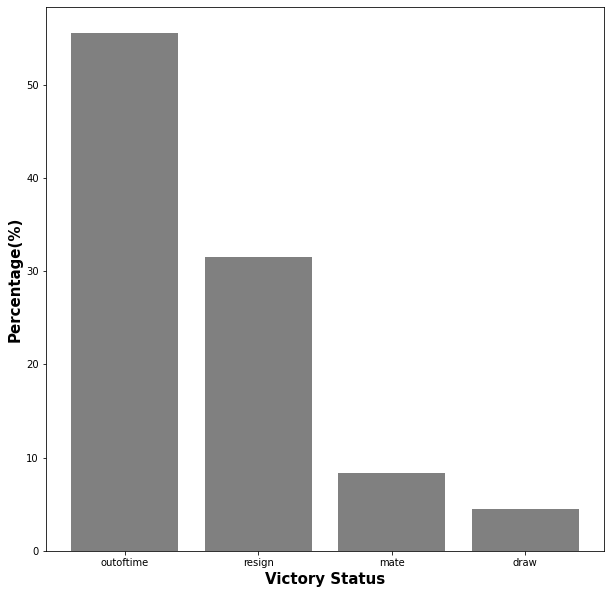

In [6]:
%matplotlib inline
x = df['victory_status'].unique().tolist()

summ_all = sum(df['victory_status'].value_counts().tolist())
y = [(x/summ_all) * 100 for x in df['victory_status'].value_counts().tolist()]

fig_vict, ax_vict = plt.subplots()

ax_vict.bar(x, y, color='grey')
ax_vict.set_facecolor('white')
ax_vict.set_xlabel('Victory Status', fontsize=15, fontweight="bold")
ax_vict.set_ylabel('Percentage(%)', fontsize=15, fontweight="bold")

fig_vict.set_facecolor('white')
fig_vict.set_figwidth(10)
fig_vict.set_figheight(10)

plt.show()

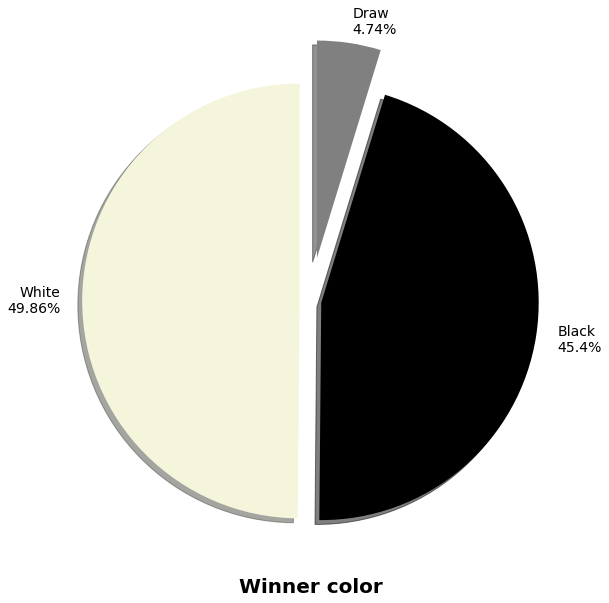

In [7]:
%matplotlib inline
sizes = df['winner'].value_counts().tolist()
labels = [x.capitalize() for x in df['winner'].unique().tolist()]

labels_sizes = dict(zip(labels, sizes))
labels_perc = [str(x) + '\n' + str(round(key * 100 / sum(sizes), 2)) + '%'
               for x, key in labels_sizes.items()]

fig_color, ax_color = plt.subplots()

explode = (0.05, 0.05, 0.2)

colors = ( "beige", "black", "grey")

fig_color.set_figwidth(10)
fig_color.set_figheight(10)

ax_color.pie(sizes, 
             explode=explode, 
             labels=labels_perc,
             shadow=True, 
             startangle=90,
             textprops={'fontsize': 14},
             colors = colors
             #autopct='%1.1f%%'
            )
ax_color.set_xlabel('Winner color', fontsize=20, fontweight="bold")
#ax_color.set_title('Color of winner')


plt.show()

In [8]:
white_rating = pd.DataFrame({"color": ['white'] * len(df['white_rating']),
                   "rating": df['white_rating']})

black_rating = pd.DataFrame({"color": ['black'] * len(df['black_rating']),
                   "rating": df['black_rating']})

data_rating = pd.concat([white_rating, black_rating], ignore_index=True)

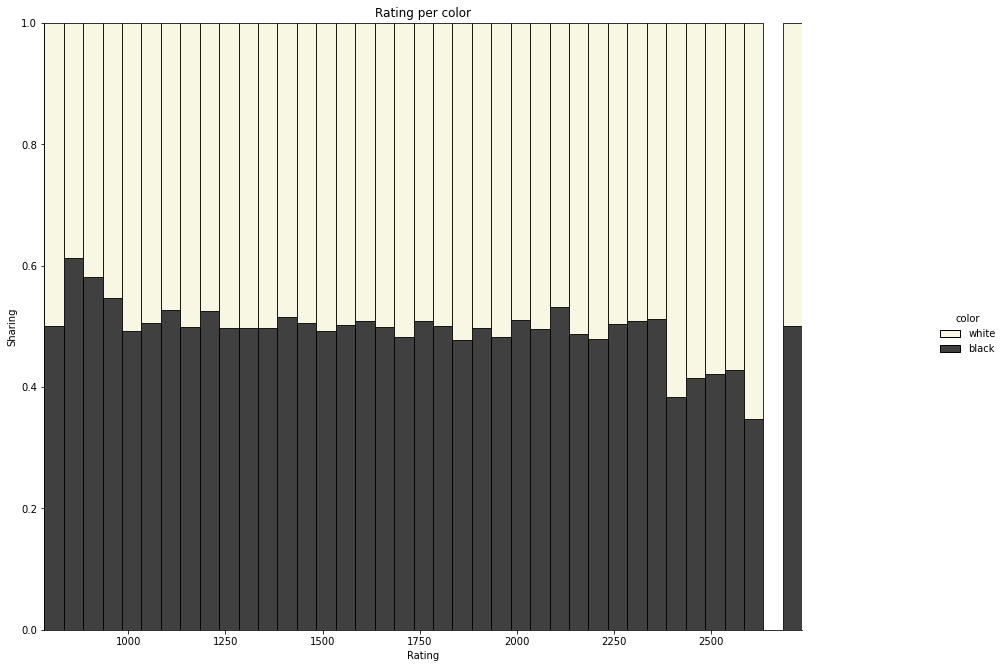

In [9]:
hist_rating = sns.displot(x='rating',
                          hue='color',
                          multiple='fill',
                          palette = ['beige', 'black'],
                          binwidth=50,
                          data=data_rating);

hist_rating.set(xlabel='Rating', 
                ylabel='Sharing', 
                title='Rating per color')
sns.set_context("paper", rc={"font.size":20,
                             "axes.titlesize":20,
                             "axes.labelsize":20,
                             "legend.fontsize":6})

plt.gcf().set_size_inches(15, 10)

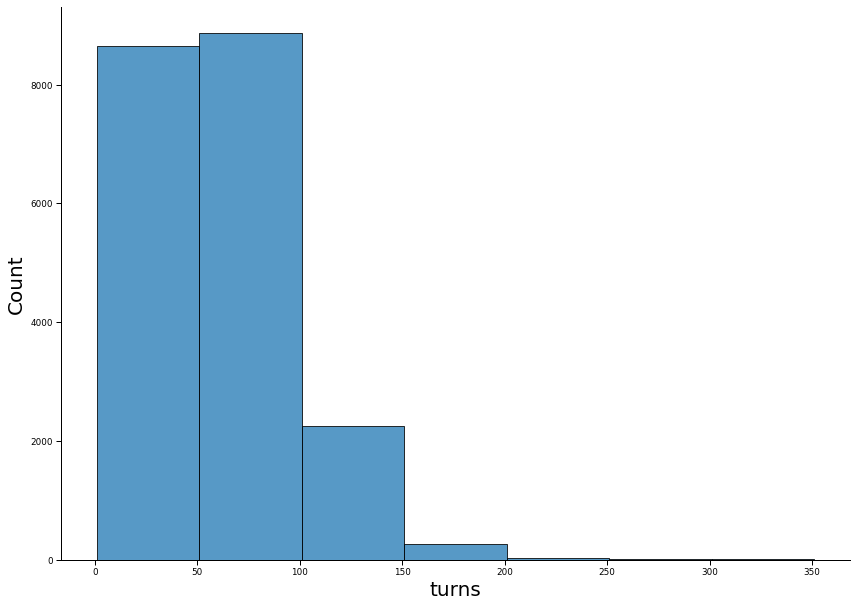

In [10]:
hist_rating = sns.displot(x='turns',
                          binwidth=50,
                          data=df);

# hist_rating.set(xlabel='Rating', 
#                 ylabel='Sharing', 
#                 title='Rating per color')
# sns.set_context("paper", rc={"font.size":20,
#                              "axes.titlesize":20,
#                              "axes.labelsize":20,
#                              "legend.fontsize":6})

plt.gcf().set_size_inches(15, 10)

In [11]:
from IPython.core.display import display, HTML
display(HTML("<u><h1><font color='black'>Feature engineering</font></h1></u>"))

In [12]:
#create new column which contains index

In [13]:
df['index'] = df.index

In [14]:
#create new column which contains two first moves

In [15]:
two_moves_list = []
for item in df['moves']:
    two_moves = item.split()[:2]
    s = ''
    two_moves_list.append(s.join(two_moves))
df['two_moves'] = two_moves_list

In [16]:
#create new column which contains increment info

In [17]:
inc_list = []
for item in df['increment_code']:
    inc = int(item[item.find('+') + 1:])
    inc_list.append(inc)
df['increment'] = inc_list

In [18]:
#replace 'increment_code' column with 'time' column, which contains only time info without increment

In [19]:
time_list = []
for item in df['increment_code']:
    time = int(item[:item.find('+')])
    time_list.append(time)
df['time'] = time_list

In [20]:
#drop excess columns

In [21]:
df_droped = df.drop(['moves', 'opening_name', 'white_id', 'black_id', 'increment_code', 'id'], axis=1)

In [22]:
df_droped.head()

,rated,created_at,last_move_at,turns,victory_status,winner,white_rating,black_rating,opening_eco,opening_ply,index,two_moves,increment,time
0,False,1.504210e+12,1.504210e+12,13,outoftime,white,1500,1191,D10,5,0,d4d5,2,15
1,True,1.504130e+12,1.504130e+12,16,resign,black,1322,1261,B00,4,1,d4Nc6,10,5
2,True,1.504130e+12,1.504130e+12,61,mate,white,1496,1500,C20,3,2,e4e5,10,5
3,True,1.504110e+12,1.504110e+12,61,mate,white,1439,1454,D02,3,3,d4d5,0,20
4,True,1.504030e+12,1.504030e+12,95,mate,white,1523,1469,C41,5,4,e4e5,3,30


In [23]:
#managing data types

In [24]:
df_droped.dtypes

rated                bool
created_at        float64
last_move_at      float64
turns               int64
victory_status     object
winner             object
white_rating        int64
black_rating        int64
opening_eco        object
opening_ply         int64
index               int64
two_moves          object
increment           int64
time                int64
dtype: object

In [25]:
df_droped["rated"] = df_droped["rated"].astype(int)

In [26]:
#encoding categorical variables

In [27]:
num_df = df_droped.select_dtypes(include=['object']).copy()
num_df['index'] = df.index
num_df.head()

,victory_status,winner,opening_eco,two_moves,index
0,outoftime,white,D10,d4d5,0
1,resign,black,B00,d4Nc6,1
2,mate,white,C20,e4e5,2
3,mate,white,D02,d4d5,3
4,mate,white,C41,e4e5,4


In [28]:
num_df["victory_status"] = num_df["victory_status"].astype('category')
num_df["winner"] = num_df["winner"].astype('category')
num_df["two_moves"] = num_df["two_moves"].astype('category')
num_df["opening_eco"] = num_df["opening_eco"].astype('category')

In [29]:
num_df.dtypes

victory_status    category
winner            category
opening_eco       category
two_moves         category
index                int64
dtype: object

In [30]:
num_df["victory_status_num"] = num_df["victory_status"].cat.codes
num_df["winner_num"] = num_df["winner"].cat.codes
num_df["two_moves_num"] = num_df["two_moves"].cat.codes
num_df["opening_eco_num"] = num_df["opening_eco"].cat.codes
num_df = num_df.drop(['victory_status', 'winner', 'two_moves', 'opening_eco'], axis=1)
num_df.head()

,index,victory_status_num,winner_num,two_moves_num,opening_eco_num
0,0,2,2,126,248
1,1,3,0,117,71
2,2,1,2,162,171
3,3,1,2,126,241
4,4,1,2,162,192


In [31]:
df_droped.head()

,rated,created_at,last_move_at,turns,victory_status,winner,white_rating,black_rating,opening_eco,opening_ply,index,two_moves,increment,time
0,0,1.504210e+12,1.504210e+12,13,outoftime,white,1500,1191,D10,5,0,d4d5,2,15
1,1,1.504130e+12,1.504130e+12,16,resign,black,1322,1261,B00,4,1,d4Nc6,10,5
2,1,1.504130e+12,1.504130e+12,61,mate,white,1496,1500,C20,3,2,e4e5,10,5
3,1,1.504110e+12,1.504110e+12,61,mate,white,1439,1454,D02,3,3,d4d5,0,20
4,1,1.504030e+12,1.504030e+12,95,mate,white,1523,1469,C41,5,4,e4e5,3,30


In [32]:
df_num = pd.merge(df_droped, num_df, on='index')
df_num = df_num.drop(['victory_status', 'opening_eco', 'two_moves', 'index', 'winner'], axis=1)
df_num.shape

(20058, 13)

In [33]:
df_num.head()

,rated,created_at,last_move_at,turns,white_rating,black_rating,opening_ply,increment,time,victory_status_num,winner_num,two_moves_num,opening_eco_num
0,0,1.504210e+12,1.504210e+12,13,1500,1191,5,2,15,2,2,126,248
1,1,1.504130e+12,1.504130e+12,16,1322,1261,4,10,5,3,0,117,71
2,1,1.504130e+12,1.504130e+12,61,1496,1500,3,10,5,1,2,162,171
3,1,1.504110e+12,1.504110e+12,61,1439,1454,3,0,20,1,2,126,241
4,1,1.504030e+12,1.504030e+12,95,1523,1469,5,3,30,1,2,162,192


In [35]:
#lets drop information, that only exist in the end of the game

In [ ]:
df_fin = df_droped.drop(['last_move_at', 'turns'])

In [34]:
from IPython.core.display import display, HTML
display(HTML("<u><h1><font color='black'>Modeling</font></h1></u>"))